In this notebook, show how to convert data between domains. 

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES']="3"
import tensorflow as tf
from model import cyclegan
import argparse
from utils import *
from glob import glob
import numpy as np

define model hyperparameters.

In [16]:
hparams = tf.contrib.training.HParams(
    dataset_dir='horse2gray',
    epoch=200,
    epoch_step=100,
    batch_size=1,
    train_size=1e8,
    load_size=286,
    fine_size=256,
    ngf=64,
    ndf=64,
    input_nc=3,
    output_nc=3,
    lr=0.0002,
    beta1=0.5,
    which_direction='AtoB',
    phase='train',
    save_freq=1000,
    print_freq=100,
    continue_train=False,
    checkpoint_dir='./checkpoint',
    sample_dir='./sample',
    test_dir='./test',
    L1_lambda=10.0,
    use_resnet=True,
    use_lsgan=True,
    max_size=50,
)


initialize model

In [17]:
# init model
tf.reset_default_graph()
tfconfig = tf.ConfigProto(allow_soft_placement=True)
tfconfig.gpu_options.allow_growth = True
sess = tf.InteractiveSession(config=tfconfig)
model = cyclegan(sess, hparams)

define utility functions

In [71]:
def load_model(dataset_dir):
    model.dataset_dir = dataset_dir
    model.load(hparams.checkpoint_dir)

def preprocess_image(img, fine_size):
    img = scipy.misc.imresize(img, [fine_size, fine_size])
    img = img/127.5 - 1
    return img

In [83]:
gray_files = glob('./datasets/{}/*.*'.format(hparams.dataset_dir + '/testB')) # gray horse
gray_file = np.random.choice(gray_files)
gray_file

'./datasets/horse2gray/testB/n02381460_1630.jpg'

/home/weidagogo/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


(256, 256, 3)

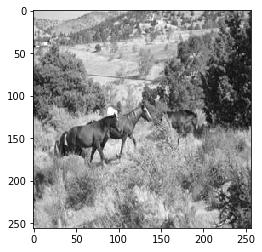

In [84]:
# show image and shape
gray_horse = 256-scipy.misc.imread(gray_file, mode="RGB").astype(np.float)
plt.imshow(gray_horse)
gray_horse.shape

/home/weidagogo/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


(256, 256, 3)

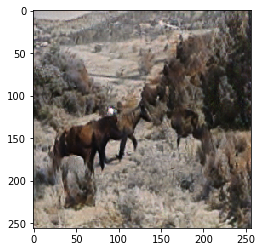

In [86]:
color_horse = sess.run(model.testA, feed_dict={model.test_B: preprocess_image(gray_horse, hparams.fine_size)[None,:]})[0]
plt.imshow(inverse_transform(color_horse))
color_horse.shape

In [87]:
load_model("horse2zebra")

 [*] Reading checkpoint...
INFO:tensorflow:Restoring parameters from ./checkpoint/horse2zebra_256/cyclegan.model-213002


/home/weidagogo/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


(256, 256, 3)

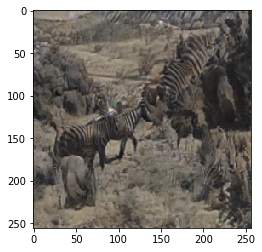

In [94]:
color_zebra = sess.run(model.testB, feed_dict={model.test_A: preprocess_image(color_horse, hparams.fine_size)[None,:]})[0]
plt.imshow(inverse_transform(color_zebra))
color_zebra.shape